# Project 1: MTA DATA Analysis

### Dataset Explained

http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

> Field Description

> C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


> C/A      = Control Area (A002) <br>
> UNIT     = Remote Unit for a station (R051) <br>
> SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)<br>
> STATION  = Represents the station name the device is located at<br>
> LINENAME = Represents all train lines that can be boarded at this station<br>
>             Normally lines are represented by one character.  <br>
>             LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.<br>
> DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND<br>   
> DATE     = Represents the date (MM-DD-YY)<br>
> TIME     = Represents the time (hh:mm:ss) for a scheduled audit event<br>
> DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
>           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
>           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that 
               was recovered.
> ENTRIES  = The comulative entry register value for a device<br>
> EXIST    = The cumulative exit register value for a device<br>


> Example:<br>
> The data below shows the entry/exit register values for one turnstile at control area (A002) from 09/27/14 at 00:00 <br>  
> hours to 09/29/14 at 00:00 hours<br>


> C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS<br>
> A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,00:00:00,REGULAR,0004800073,0001629137,<br>

### 1. Do necessary imports.

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import numpy as np
import time
import seaborn as sns
import math
from datetime import timedelta, date

# Configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# Allow the visuals to render within your Jupyter Notebook
%matplotlib inline

### 2. Download the data set


In [280]:
mta_feb_2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190202.txt", parse_dates = ['DATE'])

In [281]:
mta_feb_9 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190209.txt", parse_dates = ['DATE'])

In [282]:
mta_feb_16 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190216.txt", parse_dates = ['DATE'])
mta_feb_23 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190223.txt", parse_dates = ['DATE'])

In [344]:
file_list = []
file_list.append(mta_feb_2)
file_list.append(mta_feb_9)
file_list.append(mta_feb_16)
file_list.append(mta_feb_23)

In [345]:
mta_test = pd.concat(file_list, axis = 0, ignore_index = True)

### 3. Fix column name


In [346]:
mta_test.rename(columns = {'EXITS                                                               ': 'EXITS'}, inplace = True)

In [347]:
mta_test.columns.values

array(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES', 'EXITS'], dtype=object)

In [348]:
mta_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814439 entries, 0 to 814438
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       814439 non-null  object        
 1   UNIT      814439 non-null  object        
 2   SCP       814439 non-null  object        
 3   STATION   814439 non-null  object        
 4   LINENAME  814439 non-null  object        
 5   DIVISION  814439 non-null  object        
 6   DATE      814439 non-null  datetime64[ns]
 7   TIME      814439 non-null  object        
 8   DESC      814439 non-null  object        
 9   ENTRIES   814439 non-null  int64         
 10  EXITS     814439 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 68.4+ MB


In [381]:
mta_test

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,03:00:00,REGULAR,6922652,2347673
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,07:00:00,REGULAR,6922669,2347688
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,11:00:00,REGULAR,6922747,2347773
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,15:00:00,RECOVR AUD,6922932,2347849
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,19:00:00,REGULAR,6923237,2347911
...,...,...,...,...,...,...,...,...,...,...,...
814434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-22,04:00:00,REGULAR,5554,369
814435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-22,08:00:00,REGULAR,5554,369
814436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-22,12:00:00,REGULAR,5554,369
814437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-22,16:00:00,REGULAR,5554,369


### 4. Filter to top 5 stations and find daily entries and exits


In [349]:
#create new df with the 5 top stations

list_5_stations = ['34 ST-PENN STA','GRD CNTRL-42 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ','TIMES SQ-42 ST' ]
station_filter_df = mta_test[mta_test.STATION.isin(list_5_stations)]

In [350]:
#Group by Station and Date, then find number of entries and exits by subtracting max from min, by date
mta_entries = station_filter_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].max() - station_filter_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE'])['ENTRIES'].min()

mta_exits = station_filter_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].max() - station_filter_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE'])['EXITS'].min()



In [351]:
#Convert the 2 series into 2 data frames, and merge them
entries_flat = mta_entries.reset_index()
exist_flat = mta_exits.reset_index()

mta_flat_df = pd.merge(entries_flat, exist_flat, how='inner')

### 5. Find total traffic by adding 'ENTRIES' and 'EXITS'


In [352]:
#Include a traffic column (entries + exit)
mta_flat_df['TRAFFIC'] = mta_flat_df['ENTRIES'] + mta_flat_df['EXITS']

### 6. Get rid of turnstile data that is too high (above 50,000)


In [375]:
mta_flat_df = mta_flat_df[mta_flat_df.TRAFFIC < 50000]

### 7. Add in Days of the Week


In [404]:
#Group by station and date
mta_flat_df = mta_flat_df.groupby(['STATION', 'DATE'])['TRAFFIC'].sum().reset_index()


In [377]:
#Add in day of week
mta_flat_df['day_of_week'] = mta_flat_df['DATE'].dt.day_name()
mta_flat_df['day_of_week_in_num'] = mta_flat_df['DATE'].dt.dayofweek 

# Graphing Time

#### Graph #1. Total Traffic over the whole time period (Jan 26, 2019 to Feb 22, 2019)

In [379]:
#group by 5 stations
top_five_group = mta_flat_df.groupby(['STATION'])['TRAFFIC'].sum().reset_index()

top_five_group.sort_values('TRAFFIC', ascending = False, inplace = True)

top_five_group


,STATION,TRAFFIC
2,34 ST-PENN STA,7155958
3,GRD CNTRL-42 ST,6148447
1,34 ST-HERALD SQ,5202909
4,TIMES SQ-42 ST,4250258
0,14 ST-UNION SQ,4013493


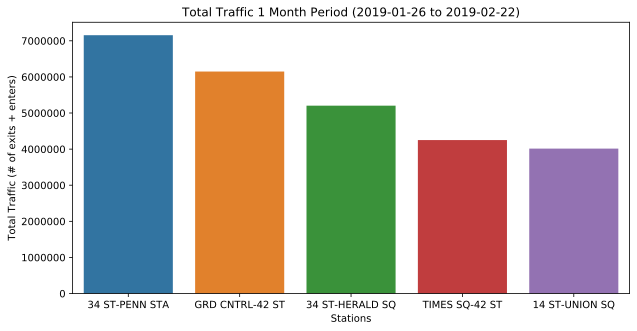

In [390]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'STATION', y = 'TRAFFIC', data = top_five_group).set_title('Total Traffic 1 Month Period (2019-01-26 to 2019-02-22)')
plt.xlabel('Stations')
plt.ylabel('Total Traffic (# of exits + enters)')
plt.savefig('TotalTraffic.jpeg');

#### Graph #2. Among the top 5 stations in the month, which day was the busiest?

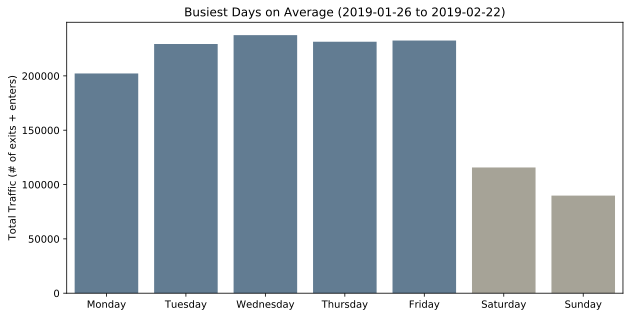

In [389]:
#group by 5 day of the week
top_days = mta_flat_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()

plt.figure(figsize = (10,5))

with sns.xkcd_palette(['steel blue', 'steel blue', 'steel blue', 'steel blue', 'steel blue', 'greyish', 'greyish']):
    sns.barplot(x = 'day_of_week', y = 'TRAFFIC', data = top_days).set_title('Busiest Days on Average (2019-01-26 to 2019-02-22)')

    plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic (# of exits + enters)')
plt.xlabel('')
plt.savefig('DailyTraffic.jpeg');

#### Graph #3. Which day is the busiest for each station?

In [265]:
#Split into 5 dfs, one for each station, and group by DAY OF WEEK
Union_SQ_df = mta_flat_df[mta_flat_df.STATION.isin(['14 ST-UNION SQ'])]
Herald_SQ_df = mta_flat_df[mta_flat_df.STATION.isin(['34 ST-HERALD SQ'])]
Penn_STA_df = mta_flat_df[mta_flat_df.STATION.isin(['34 ST-PENN STA'])]
Grd_Cntrl_df = mta_flat_df[mta_flat_df.STATION.isin(['GRD CNTRL-42 ST'])]
Times_sq_df = mta_flat_df[mta_flat_df.STATION.isin(['TIMES SQ-42 ST'])]

top_days_UNION = Union_SQ_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()
top_days_HERALD = Herald_SQ_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()
top_days_PENN = Penn_STA_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()
top_days_GC = Grd_Cntrl_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()
top_days_TIMES = Times_sq_df.groupby(['day_of_week_in_num','day_of_week'])['TRAFFIC'].mean().reset_index()


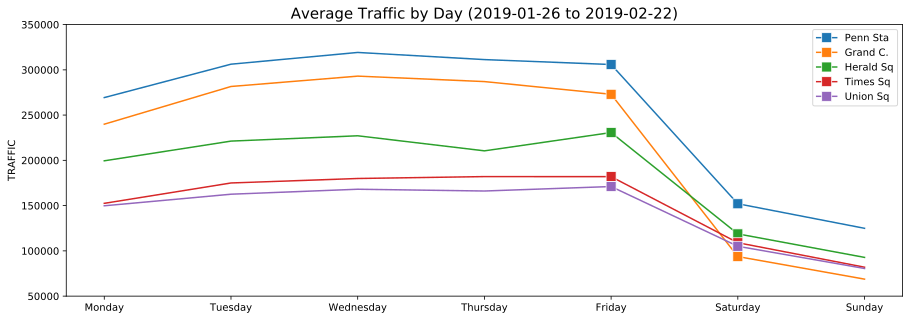

In [403]:
#Plotting
plt.figure(figsize = (15,5))
sns.lineplot(x = 'day_of_week_in_num', y = 'TRAFFIC', data = top_days_PENN, label = 'Penn Sta', ms = 10, marker ='s', markevery = [4,5]).set(ylim = (50000,350000),xticklabels = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
sns.lineplot(x = 'day_of_week_in_num', y = 'TRAFFIC', data = top_days_GC, label = 'Grand C.', ms = 10, marker ='s', markevery = [4,5]).set(ylim = (50000,350000))
sns.lineplot(x = 'day_of_week_in_num', y = 'TRAFFIC', data = top_days_HERALD, label = 'Herald Sq', ms = 10, marker ='s', markevery = [4,5]).set(ylim = (50000,350000))
sns.lineplot(x = 'day_of_week_in_num', y = 'TRAFFIC', data = top_days_TIMES, label = 'Times Sq', ms = 10, marker ='s', markevery = [4,5]).set(ylim = (50000,350000))
sns.lineplot(x = 'day_of_week_in_num', y = 'TRAFFIC', data = top_days_UNION, label = 'Union Sq', ms = 10, marker ='s', markevery = [4,5]).set(ylim = (50000,350000))

plt.title('Average Traffic by Day (2019-01-26 to 2019-02-22)', fontsize = 15)
plt.xlabel('')
plt.savefig('WeeklyTraffic.jpeg');
